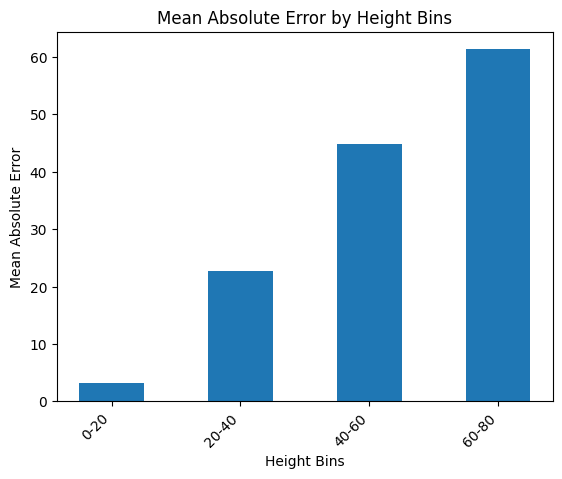

In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Define the bin edges
bin_edges = np.arange(0, 100, 20)  # Define your desired bin edges here

# Initialize lists to store the absolute errors and heights
absolute_errors = []
heights = []

# Iterate over the images in the predicted folder
predicted_folder = 'data/test_dataset/predicted'
real_mask_folder = 'data/test_dataset/masks'

for predicted_filename in os.listdir(predicted_folder):
    if predicted_filename.endswith('_OUT.png'):
        # Extract the file ID from the predicted image filename
        file_id = os.path.splitext(predicted_filename)[0]

        # Construct the corresponding mask image filename
        mask_filename = file_id.replace('_BAM_OUT', '') + '_AGL.tif'

        # Load the predicted image
        predicted_img = np.array(Image.open(os.path.join(predicted_folder, predicted_filename)))
        real_mask_img = np.array(Image.open(os.path.join(real_mask_folder, mask_filename)))

        # Calculate the absolute error between predicted and real heights
        absolute_error = np.abs(predicted_img - real_mask_img)

        # Flatten the error and real height arrays
        flat_error = absolute_error.flatten()
        flat_height = real_mask_img.flatten()

        # Digitize the heights into bins
        bins = np.digitize(flat_height, bins=bin_edges)

        # Store the error and height information
        absolute_errors.extend(flat_error)
        heights.extend(flat_height)

# Convert lists to numpy arrays
absolute_errors = np.array(absolute_errors)
heights = np.array(heights)

# Digitize the heights into bins
bins = np.digitize(heights, bins=bin_edges)

# Calculate the mean absolute error for each bin
mean_absolute_errors = []
for i in range(1, len(bin_edges)):
    bin_indices = np.where(bins == i)
    bin_error = absolute_errors[bin_indices]
    mean_absolute_error = np.mean(bin_error)
    mean_absolute_errors.append(mean_absolute_error)

# Plot the mean absolute errors
plt.bar(range(len(mean_absolute_errors)), mean_absolute_errors, align='center', width=0.5)
plt.xlabel('Height Bins')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error by Height Bins')
plt.xticks(range(len(bin_edges) - 1), [f'{bin_edges[i]}-{bin_edges[i + 1]}' for i in range(len(bin_edges) - 1)], rotation=45, ha='right')
plt.show()


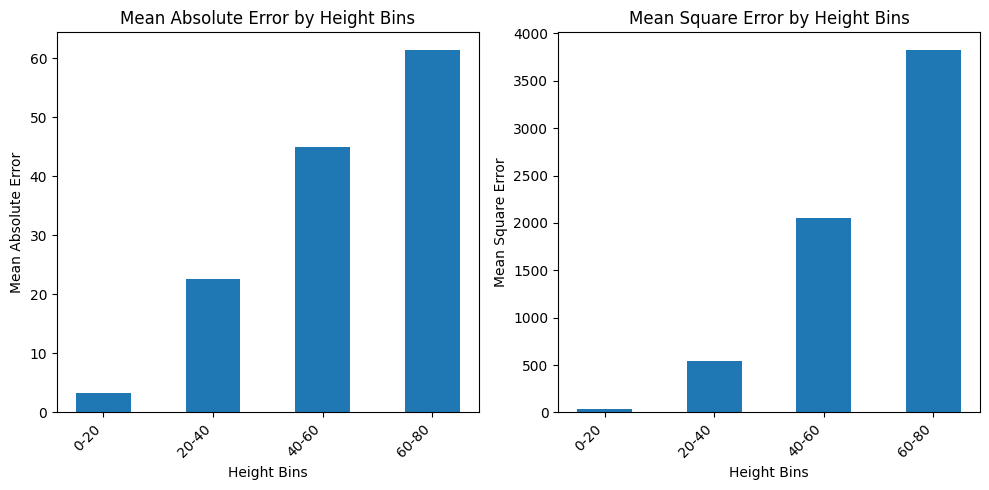

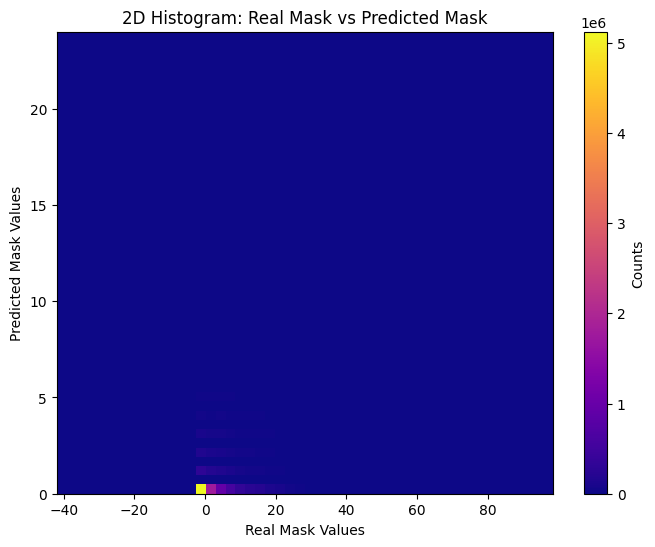

In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Define the bin edges
bin_edges = np.arange(0, 100, 20)  # Define your desired bin edges here

# Initialize lists to store the absolute errors, square errors, and heights
absolute_errors = []
square_errors = []
heights = []
real_mask_values = []
predicted_mask_values = []

# Iterate over the images in the predicted folder
predicted_folder = 'data/test_dataset/predicted'
real_mask_folder = 'data/test_dataset/masks'

for predicted_filename in os.listdir(predicted_folder):
    if predicted_filename.endswith('_OUT.png'):
        # Extract the file ID from the predicted image filename
        file_id = os.path.splitext(predicted_filename)[0]

        # Construct the corresponding mask image filename
        mask_filename = file_id.replace('_BAM_OUT', '') + '_AGL.tif'

        # Load the predicted image
        predicted_img = np.array(Image.open(os.path.join(predicted_folder, predicted_filename)))
        real_mask_img = np.array(Image.open(os.path.join(real_mask_folder, mask_filename)))

        # Calculate the absolute error between predicted and real heights
        absolute_error = np.abs(predicted_img - real_mask_img)
        square_error = (predicted_img - real_mask_img) ** 2

        # Flatten the error and real height arrays
        flat_error = absolute_error.flatten()
        flat_square_error = square_error.flatten()
        flat_height = real_mask_img.flatten()
        flat_real_mask_values = real_mask_img.flatten()
        flat_predicted_mask_values = predicted_img.flatten()

        # Digitize the heights into bins
        bins = np.digitize(flat_height, bins=bin_edges)

        # Store the error, square error, and height information
        absolute_errors.extend(flat_error)
        square_errors.extend(flat_square_error)
        heights.extend(flat_height)
        real_mask_values.extend(flat_real_mask_values)
        predicted_mask_values.extend(flat_predicted_mask_values)

# Convert lists to numpy arrays
absolute_errors = np.array(absolute_errors)
square_errors = np.array(square_errors)
heights = np.array(heights)
real_mask_values = np.array(real_mask_values)
predicted_mask_values = np.array(predicted_mask_values)

# Digitize the heights into bins
bins = np.digitize(heights, bins=bin_edges)

# Calculate the mean absolute error (MAE) and mean square error (MSE) for each bin
mean_absolute_errors = []
mean_square_errors = []
for i in range(1, len(bin_edges)):
    bin_indices = np.where(bins == i)
    bin_absolute_error = absolute_errors[bin_indices]
    bin_square_error = square_errors[bin_indices]
    mean_absolute_error = np.mean(bin_absolute_error)
    mean_square_error = np.mean(bin_square_error)
    mean_absolute_errors.append(mean_absolute_error)
    mean_square_errors.append(mean_square_error)

# Plot the mean absolute error (MAE) and mean square error (MSE) for each bin
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(range(len(mean_absolute_errors)), mean_absolute_errors, align='center', width=0.5)
plt.xlabel('Height Bins')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error by Height Bins')
plt.xticks(range(len(bin_edges) - 1), [f'{bin_edges[i]}-{bin_edges[i + 1]}' for i in range(len(bin_edges) - 1)], rotation=45, ha='right')

plt.subplot(1, 2, 2)
plt.bar(range(len(mean_square_errors)), mean_square_errors, align='center', width=0.5)
plt.xlabel('Height Bins')
plt.ylabel('Mean Square Error')
plt.title('Mean Square Error by Height Bins')
plt.xticks(range(len(bin_edges) - 1), [f'{bin_edges[i]}-{bin_edges[i + 1]}' for i in range(len(bin_edges) - 1)], rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Plot the 2D histogram chart for the real mask vs predicted mask
plt.figure(figsize=(8, 6))
plt.hist2d(real_mask_values, predicted_mask_values, bins=(50, 50), cmap='plasma')
plt.colorbar(label='Counts')
plt.xlabel('Real Mask Values')
plt.ylabel('Predicted Mask Values')
plt.title('2D Histogram: Real Mask vs Predicted Mask')
plt.show()


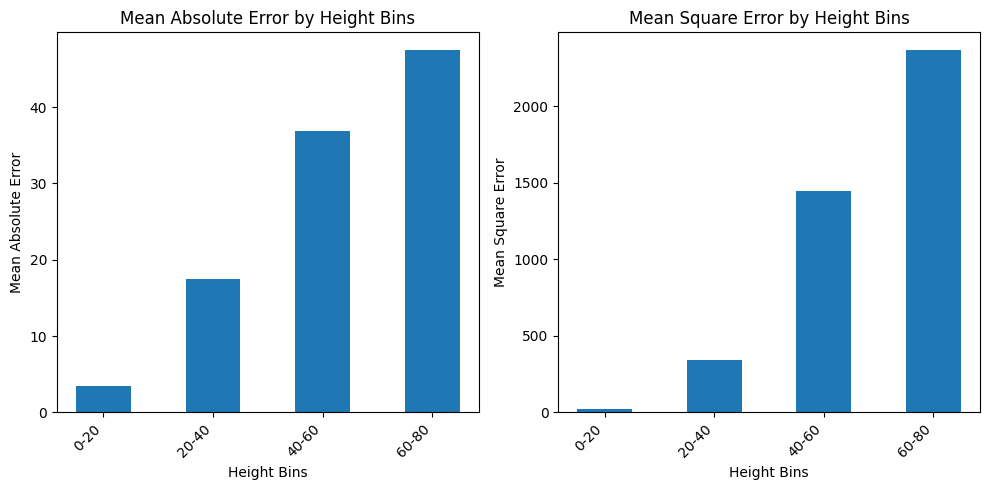

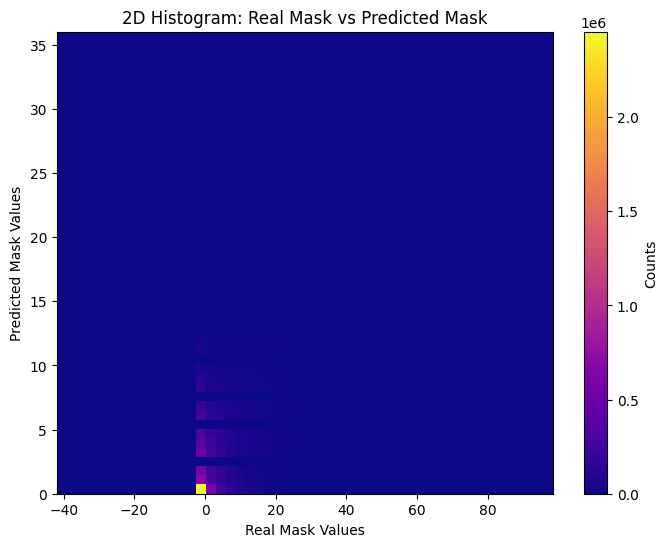

In [29]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Define the bin edges
bin_edges = np.arange(0, 100, 20)  # Define your desired bin edges here

# Initialize lists to store the absolute errors, square errors, and heights
absolute_errors = []
square_errors = []
heights = []
real_mask_values = []
predicted_mask_values = []

# Iterate over the images in the predicted folder
predicted_folder = 'data/test_dataset/predicted3'
real_mask_folder = 'data/test_dataset/masks'

for predicted_filename in os.listdir(predicted_folder):
    if predicted_filename.endswith('_OUT.png'):
        # Extract the file ID from the predicted image filename
        file_id = os.path.splitext(predicted_filename)[0]

        # Construct the corresponding mask image filename
        mask_filename = file_id.replace('_BAM_OUT', '') + '_AGL.tif'

        # Load the predicted image
        predicted_img = np.array(Image.open(os.path.join(predicted_folder, predicted_filename)))
        real_mask_img = np.array(Image.open(os.path.join(real_mask_folder, mask_filename)))

        # Calculate the absolute error between predicted and real heights
        absolute_error = np.abs(predicted_img - real_mask_img)
        square_error = (predicted_img - real_mask_img) ** 2

        # Flatten the error and real height arrays
        flat_error = absolute_error.flatten()
        flat_square_error = square_error.flatten()
        flat_height = real_mask_img.flatten()
        flat_real_mask_values = real_mask_img.flatten()
        flat_predicted_mask_values = predicted_img.flatten()

        # Digitize the heights into bins
        bins = np.digitize(flat_height, bins=bin_edges)

        # Store the error, square error, and height information
        absolute_errors.extend(flat_error)
        square_errors.extend(flat_square_error)
        heights.extend(flat_height)
        real_mask_values.extend(flat_real_mask_values)
        predicted_mask_values.extend(flat_predicted_mask_values)

# Convert lists to numpy arrays
absolute_errors = np.array(absolute_errors)
square_errors = np.array(square_errors)
heights = np.array(heights)
real_mask_values = np.array(real_mask_values)
predicted_mask_values = np.array(predicted_mask_values)

# Digitize the heights into bins
bins = np.digitize(heights, bins=bin_edges)

# Calculate the mean absolute error (MAE) and mean square error (MSE) for each bin
mean_absolute_errors = []
mean_square_errors = []
for i in range(1, len(bin_edges)):
    bin_indices = np.where(bins == i)
    bin_absolute_error = absolute_errors[bin_indices]
    bin_square_error = square_errors[bin_indices]
    mean_absolute_error = np.mean(bin_absolute_error)
    mean_square_error = np.mean(bin_square_error)
    mean_absolute_errors.append(mean_absolute_error)
    mean_square_errors.append(mean_square_error)

# Plot the mean absolute error (MAE) and mean square error (MSE) for each bin
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(range(len(mean_absolute_errors)), mean_absolute_errors, align='center', width=0.5)
plt.xlabel('Height Bins')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error by Height Bins')
plt.xticks(range(len(bin_edges) - 1), [f'{bin_edges[i]}-{bin_edges[i + 1]}' for i in range(len(bin_edges) - 1)], rotation=45, ha='right')

plt.subplot(1, 2, 2)
plt.bar(range(len(mean_square_errors)), mean_square_errors, align='center', width=0.5)
plt.xlabel('Height Bins')
plt.ylabel('Mean Square Error')
plt.title('Mean Square Error by Height Bins')
plt.xticks(range(len(bin_edges) - 1), [f'{bin_edges[i]}-{bin_edges[i + 1]}' for i in range(len(bin_edges) - 1)], rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Plot the 2D histogram chart for the real mask vs predicted mask
plt.figure(figsize=(8, 6))
plt.hist2d(real_mask_values, predicted_mask_values, bins=(50, 50), cmap='plasma')
plt.colorbar(label='Counts')
plt.xlabel('Real Mask Values')
plt.ylabel('Predicted Mask Values')
plt.title('2D Histogram: Real Mask vs Predicted Mask')
plt.show()


<module 'matplotlib.pyplot' from 'c:\\Users\\luism\\.conda\\envs\\SeminarARS\\lib\\site-packages\\matplotlib\\pyplot.py'>

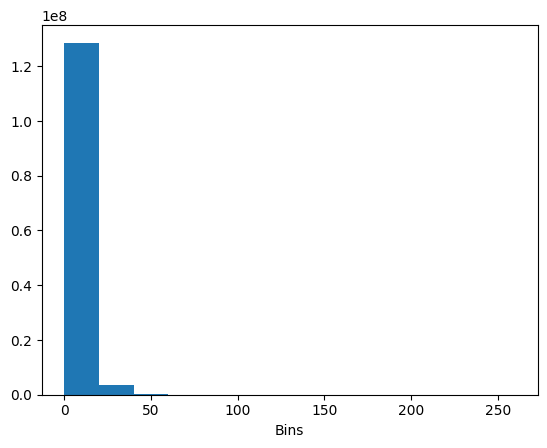

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Provided histogram data
bin_edges = np.arange(0, 265, 20)
histogram_data = [
    82887090, 6636029, 5410928, 4733216, 3785075,
    3394433, 3343998, 2977967, 2570673, 2129798,
    1816006, 1573346, 1406706, 1222381, 1065660,
    962298, 823469, 693924, 609795, 554394,
    507195, 472197, 414601, 358895, 307016,
    255064, 205767, 164817, 136418, 109081,
    88228, 72041, 56907, 55715, 43543,
    33873, 27867, 24221, 24010, 23911,
    19721, 14698, 11489, 9833, 9623,
    8562, 8324, 4868, 3602, 2585,
    3518, 1895, 1481, 1822, 4292,
    3943, 1086, 1076, 1406, 999,
    1262, 1053, 947, 1463, 1008,
    939, 1064, 979, 980, 1056,
    751, 721, 590, 514, 474,
    770, 548, 601, 379, 274,
    346, 287, 338, 470, 353,
    309, 258, 147, 177, 200,
    125, 140, 275, 227, 167,
    181, 206, 248, 404, 252,
    290, 119, 72, 121, 94,
    70, 50, 157, 66, 79,
    65, 133, 66, 115, 118,
    154, 93, 146, 101, 190,
    376, 517, 163, 430, 340,
    61, 143, 87, 78, 52,
    22, 25, 21, 21, 28,
    39, 26, 32, 45, 27,
    42, 56, 129, 72, 61,
    20, 28, 170, 151, 122,
    24, 21, 28, 13, 80,
    12, 16, 19, 23, 24,
    12, 18, 19, 40, 38,
    17, 15, 41, 17, 16,
    11, 17, 7, 10, 5,
    2, 3, 1, 1, 10,
    3, 5, 15, 6, 7,
    1, 5, 3, 4, 13,
    30, 6, 7, 10, 3,
    4, 15, 20, 8, 2,
    9, 3, 1, 9, 9,
    5, 4, 10, 5, 32,
    14, 4, 14, 6, 8,
    19, 39, 17, 14, 15,
    10, 8, 17, 40, 40,
    19, 19, 28, 25, 13,
    40, 13, 12, 12, 13,
    20, 10, 4, 3, 5,
    15, 13, 8, 2, 5,
    2, 4, 5, 8, 5,
    10, 7, 2
]

# Calculate the histogram by summing values in bins
histogram_sum = np.zeros(len(bin_edges) - 1)
for i, val in enumerate(histogram_data):
    bin_index = np.digitize([i], bin_edges) - 1  # Find the index of the bin
    histogram_sum[bin_index] += val  # Sum the value into the corresponding bin

# Plot the histogram
plt.bar(bin_edges[:-1], histogram_sum, width=np.diff(bin_edges), align='edge')
plt.xlabel('Bins')
plt

In [28]:
import pandas as pd

df= pd.DataFrame({'Bin Edges': bin_edges[:-1], 'Histogram': histogram_sum})
df.to_csv('histogram_bins.csv')
print(df)

    Bin Edges    Histogram
0           0  128597186.0
1          20    3381367.0
2          40     114823.0
3          60      16373.0
4          80       5110.0
5         100       2299.0
6         120       2533.0
7         140       1111.0
8         160        300.0
9         180        167.0
10        200        237.0
11        220        351.0
12        240         86.0
